## 3. Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
#%matplotlib inline

## 5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6869)

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


## 6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4496)

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


## 7. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6869, 4)

In [8]:
internet_df.shape

(4496, 4)

## 8. Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

## 9. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,Footnote,NaN,NaN


## 10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

### Note: Get out of habit of using "inplace" (not best practice). Reassign it to itself instead.

In [13]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [14]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [15]:
internet_df.drop('Value Footnotes', axis=1, inplace=True)

In [16]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


## 11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [17]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [18]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


## 12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [20]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [21]:
internet_df.shape

(4496, 3)

## 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [22]:
#concatenate
#gdp_and_internet_use = pd.concat([gdp_df, internet_df], axis=0)

#merge
# https://www.w3resource.com/python-exercises/pandas/joining-and-merging/pandas-joining-and-merging-dataframe-exercise-10.php
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer', on=['Country', 'Year'])

In [23]:
#groupby to remove (most) nans and combine rows
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
#https://stackoverflow.com/questions/49034202/pandas-dataframe-merging-rows-to-remove-nan
#gdp_and_internet_use = gdp_and_internet_use.groupby(['Country', 'Year']).first().reset_index()

In [24]:
gdp_and_internet_use.shape

(7906, 4)

## 14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [25]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


## 15. Look at the last five rows to make sure the data is clean and as expected.

In [26]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7901,Yemen,1999,NaN,0.056629
7902,Yemen,1998,NaN,0.023323
7903,Yemen,1997,NaN,0.015025
7904,Yemen,1996,NaN,0.000621
7905,Yemen,1990,NaN,0.000000


## 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [81]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
filter040914 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])

In [82]:
gdp_and_internet_use = gdp_and_internet_use[filter040914]

In [83]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000


In [30]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7869,Virgin Islands (U.S.),2009,NaN,27.396510
7874,Virgin Islands (U.S.),2004,NaN,27.377009
7886,Yemen,2014,NaN,22.550000
7891,Yemen,2009,NaN,9.960000
7896,Yemen,2004,NaN,0.881223


## 17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [31]:
filter2004 = gdp_and_internet_use['Year'].isin(['2004'])
gdp_internet_2004 = gdp_and_internet_use[filter2004]

In [32]:
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544


In [33]:
filter2009 = gdp_and_internet_use['Year'].isin(['2009'])
gdp_internet_2009 = gdp_and_internet_use[filter2009]

In [34]:
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55
28,Albania,2009,10346.864199,41.20
58,Algeria,2009,10782.361398,11.23
88,Angola,2009,7643.493749,6.00
118,Antigua and Barbuda,2009,20046.839017,42.00


In [35]:
filter2014 = gdp_and_internet_use['Year'].isin(['2014'])
gdp_internet_2014 = gdp_and_internet_use[filter2014]

In [36]:
gdp_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39
23,Albania,2014,11623.866679,60.10
53,Algeria,2014,11512.705405,18.09
83,Angola,2014,8239.828837,21.26
113,Antigua and Barbuda,2014,18104.241470,64.00


## 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

### Answer: Iceland (98.16%)

In [37]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.1495,98.16


## 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

### Answer: Dem. People's Rep. of Korea (0%)

In [38]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7080,Dem. People's Rep. of Korea,2014,NaN,0.0


## 20. Repeat for 2004 and 2009.

### 2004 Answers: Sweden (83.89%); Dem. People's Rep. of Korea (0%)

In [67]:
#2004 max internet usage
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89


In [40]:
#2004 min internet usage
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7089,Dem. People's Rep. of Korea,2004,NaN,0.0


### 2009 Answers: Iceland (93.0%); Dem. People's Rep. of Korea (0%)

In [41]:
#2009 max internet usage
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.0


In [42]:
#2009 min internet usage
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7084,Dem. People's Rep. of Korea,2009,NaN,0.0


## 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

### Answer: Macao SAR, China (156514.13385)

In [43]:
#2014 max gdp
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.13385,NaN


## 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

### Answer: Central African Republic (822.610458)

In [44]:
#2014 min gdp
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN


## 23. Create some scatterplots:

### a. 2004 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'Percent Internet Users')

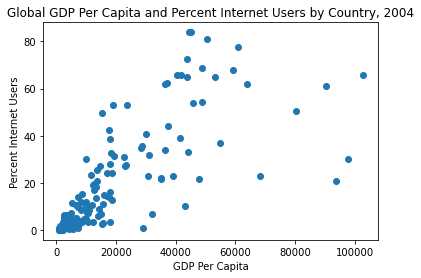

In [85]:
plt.scatter(gdp_internet_2004.GDP_Per_Capita, gdp_internet_2004.Internet_Users_Pct)
plt.title('Global GDP Per Capita and Percent Internet Users by Country, 2004')
plt.xlabel('GDP Per Capita')
plt.ylabel('Percent Internet Users')

### b. 2009 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'Percent Internet Users')

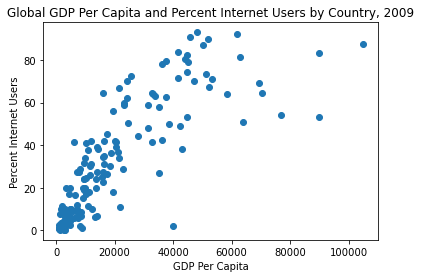

In [86]:
plt.scatter(gdp_internet_2009.GDP_Per_Capita, gdp_internet_2009.Internet_Users_Pct)
plt.title('Global GDP Per Capita and Percent Internet Users by Country, 2009')
plt.xlabel('GDP Per Capita')
plt.ylabel('Percent Internet Users')

### c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'Percent Internet Users')

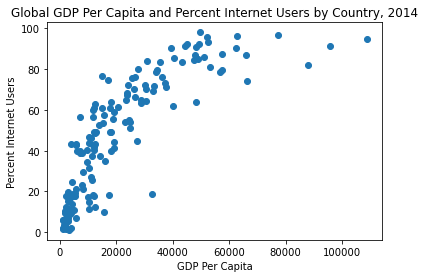

In [87]:
plt.scatter(gdp_internet_2014.GDP_Per_Capita, gdp_internet_2014.Internet_Users_Pct)
plt.title('Global GDP Per Capita and Percent Internet Users by Country, 2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Percent Internet Users')

## 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

### Answer: As GDP increases, so does the percentage of internet users. This correlation became stronger with time (in 2004, it was still fairly common for median GDP countries to have a low percentage of internet users).

## 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

### Answer: Yes, there is only one peak (0-20,000).

Text(0, 0.5, 'Number of Countries')

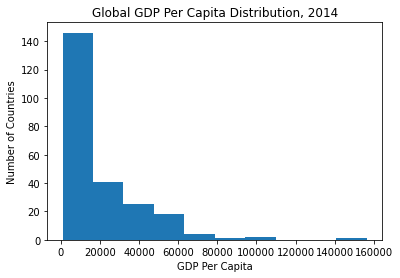

In [89]:
plt.hist(gdp_internet_2014.GDP_Per_Capita)
plt.title('Global GDP Per Capita Distribution, 2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')

## 26. Look at the distribution of Internet Use for 2014. Is it unimodal?

### Answer: No, it is bimodal (0-20%, 40-50%).

Text(0, 0.5, 'Number of Countries')

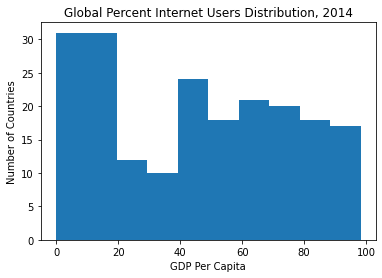

In [90]:
plt.hist(gdp_internet_2014.Internet_Users_Pct)
plt.title('Global Percent Internet Users Distribution, 2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')

## 27. What are the top 5 countries in terms of internet use in 2014?

### Answer: Iceland, Bermuda, Norway, Denmark, Luxembourg

In [50]:
gdp_internet_2014.nlargest(5, ['Internet_Users_Pct'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6872,Andorra,2014,NaN,95.90


## 28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [93]:
filter2 = gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])

In [94]:
top_5_internet = gdp_and_internet_use[filter2]
top_5_internet = top_5_internet.sort_values(by=['Country', 'Year'])
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
6882  Andorra  2004             NaN           26.837954
6877  Andorra  2009             NaN           78.530000
6872  Andorra  2014             NaN           95.900000
571   Bermuda  2004    90195.811033           60.990867
566   Bermuda  2009    89961.982744           83.250000
561   Bermuda  2014    77361.104881           96.800000
1462  Denmark  2004    50607.628971           80.930000
1457  Denmark  2009    50274.075696           86.840000
1452  Denmark  2014    52214.537753           95.990000
2635  Iceland  2004    45145.545658           83.880000
2630  Iceland  2009    48177.084123           93.000000
2625  Iceland  2014    49652.149500           98.160000
4658   Norway  2004    60893.410993           77.690000
4653   Norway  2009    61886.564498           92.080000
4648   Norway  2014    62589.373548           96.300000


## 29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

### https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Answer: Bermuda

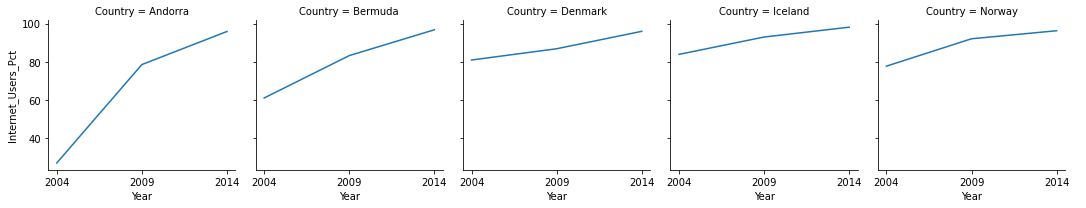

In [95]:
g = sns.FacetGrid(top_5_internet, col='Country')
g.map_dataframe(sns.lineplot, x='Year', y="Internet_Users_Pct").add_legend()

## 30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

### Answer: Dem. People's Rep. of Korea

In [71]:
#bottom 5 countries in terms of internet use in 2014
gdp_internet_2014.nsmallest(5, ['Internet_Users_Pct'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7080,Dem. People's Rep. of Korea,2014,NaN,0.00
7138,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7675,Somalia,2014,NaN,1.63


In [72]:
filter3 = gdp_and_internet_use['Country'].isin(["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia'])

In [73]:
bottom_5_internet = gdp_and_internet_use[filter3]
bottom_5_internet = bottom_5_internet.sort_values(by=['Country', 'Year'])

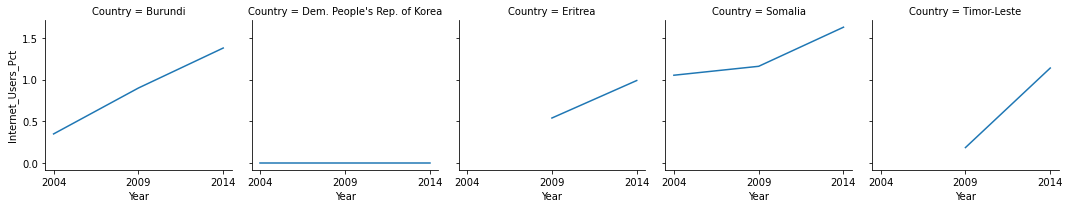

In [74]:
g2 = sns.FacetGrid(bottom_5_internet, col='Country')
g2.map_dataframe(sns.lineplot, x='Year', y="Internet_Users_Pct").add_legend()

## 31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [58]:
#find top 5 countries for 2014 in terms of GDP per capita
gdp_internet_2014.nlargest(5, ['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [75]:
#filter for top 5 countries by GDP in 2014
filter4 = gdp_and_internet_use['Country'].isin(['Macao SAR, China','Luxembourg', 'Qatar', 'Singapore', 'Bermuda'])

In [76]:
#create new dataframe and sort by country, year (so that facetgrids show up in correct order)
top_5_gdp = gdp_and_internet_use[filter4]
top_5_gdp = top_5_gdp.sort_values(by=['Country', 'Year'])

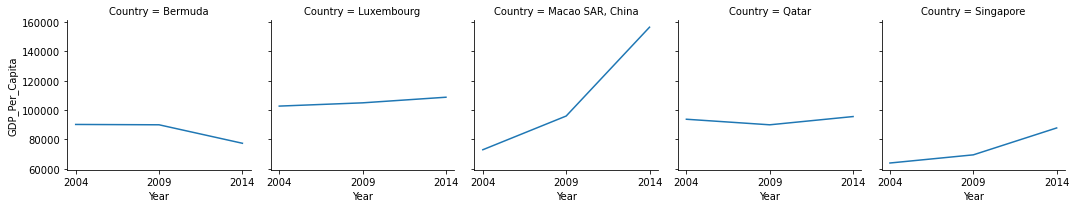

In [77]:
#create facetgrids
g3 = sns.FacetGrid(top_5_gdp, col='Country')
g3.map_dataframe(sns.lineplot, x='Year', y="GDP_Per_Capita").add_legend()

## 32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [62]:
#find bottom 5 countries for 2014 in terms of GDP per capita
gdp_internet_2014.nsmallest(5, ['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [78]:
#filter for bottom 5 countries by GDP in 2014
filter5 = gdp_and_internet_use['Country'].isin(['Central African Republic', 'Burundi', 'Malawi', 'Dem. Rep. Congo', 'Niger'])

In [79]:
#create new dataframe and sort by country, year (so that facetgrids show up in correct order)
bottom_5_gdp = gdp_and_internet_use[filter5]
bottom_5_gdp = bottom_5_gdp.sort_values(by=['Country', 'Year'])

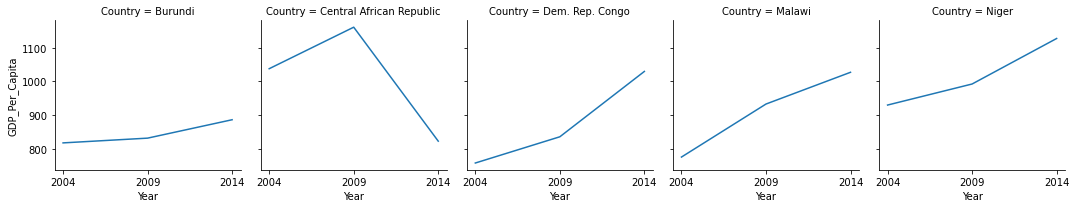

In [80]:
#create facetgrids
g4 = sns.FacetGrid(bottom_5_gdp, col='Country')
g4.map_dataframe(sns.lineplot, x='Year', y="GDP_Per_Capita").add_legend()

## 33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

### Answer: 
#### Bermuda and Central African Republic are the only top/bottom 5 GDP countries to decrease in GDP per capita between 2009 and 2014. 